In [1]:
import numpy as np

In [11]:
def calc_modified_arr(A,n,Ea,T,R):
    k = A*((T/298)**n)*np.exp(-Ea/(R*T))
    return k 

In [12]:
A = 3.77e-15* 6.023e23
n = 5.94
Ea = -2284*1.984
R=1.984

In [18]:
xdata = np.arange(200,2400)
ydata = []
for temp in xdata:
    k = calc_modified_arr(A,n,Ea,temp,R)
    ydata.append(k)
ydata= np.array(ydata)
ydata=np.log(ydata)
#plt.semilogy(xdata,ydata)

[ 4.56362137e-06  5.94000000e+00 -4.53830800e+03]


/home/carly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


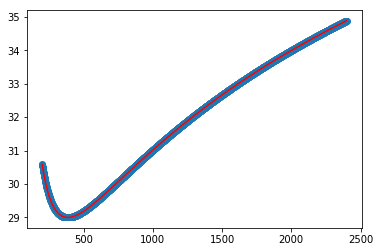

In [19]:
#fitting sigmas 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
def func(x, A,n,Ea):
    return np.log(A)+np.log(x)*n + (-Ea/(1.987*x))
plt.scatter(xdata, ydata,label='data')
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
test_array = []
for T in xdata:
    test_array.append(np.log(popt[0]*T**popt[1]*np.exp(-popt[2]/(1.987*T))))
plt.plot(xdata,test_array,'r')    

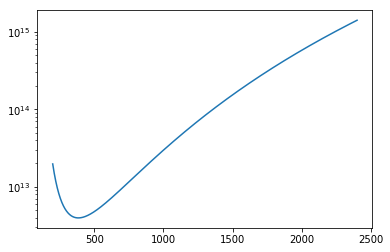

In [25]:
def arr_fit(A,n,Ea,R,T):
    return A*(T**n)*np.exp(-Ea/(R*T))
k =[]
temperature = np.arange(200,2400)
for temp in temperature:
    k.append(arr_fit(4.56362137e-06,  5.94000000e+00, -4.53830800e+03,1.984,temp))
plt.semilogy(temperature,k)